# Week 1: Setup + EDA

1. Import Libraries

In [248]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install seaborn


In [249]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import Data

In [250]:
df = pd.read_csv("bank.csv",sep=";")
missing_values = df.isnull().sum()  
print("Missing values in each column:")
print(missing_values)
#df['pdays'] = df['pdays'].replace(-1, np.nan)
#df['pdays'] = df['pdays'].fillna(df['pdays'].median())
#print(df.head())
# df.info()

#print(df.head(50))
#print(df.shape)
#print(df.info())
# print(df.describe())

Missing values in each column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


Missing Values

In [251]:
# Step 1B — Verify unstructured missing values (e.g., empty strings, placeholders)
import pandas as pd

# Define a list of common placeholders for missing values
placeholders = ["", "NA", "N/A", "null", "NULL", "na", "n/a", "Null", "None", "none"]

# Check for unstructured missing values in each column
unstructured_missing = {}
for col in df.columns:
    unstructured_missing[col] = df[col].astype(str).str.strip().isin(placeholders).sum()

print("Unstructured missing values in each column:")
print(unstructured_missing)
df['pdays']=df['pdays'].astype(int)
df.info()

Unstructured missing values in each column:
{'age': np.int64(0), 'job': np.int64(0), 'marital': np.int64(0), 'education': np.int64(0), 'default': np.int64(0), 'balance': np.int64(0), 'housing': np.int64(0), 'loan': np.int64(0), 'contact': np.int64(0), 'day': np.int64(0), 'month': np.int64(0), 'duration': np.int64(0), 'campaign': np.int64(0), 'pdays': np.int64(0), 'previous': np.int64(0), 'poutcome': np.int64(0), 'y': np.int64(0)}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null 

In [252]:
# Step 2 — Check for duplicate rows
import pandas as pd

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Display duplicate rows
if duplicate_rows > 0:
    print("Duplicate rows:")
    print(df[df.duplicated()])

Number of duplicate rows: 0


In [253]:
defaultConvert={'no':0,'yes':1}
df['default']=df['default'].map(defaultConvert)
df['housing']=df['housing'].map(defaultConvert)
df['loan']=df['loan'].map(defaultConvert)
df['y']=df['y'].map(defaultConvert)
#print(df.head(50))
# Identify float columns
float_cols = df.select_dtypes(include=['float']).columns

# Handle missing values (replace NaN with a suitable value, e.g., 0 or the median)
for col in float_cols:
    df[col] = df[col].fillna(0)  # Replace NaN with 0 (or use the median)

# Convert float columns to integer
for col in float_cols:
    df[col] = df[col].astype(int)

print(df.dtypes)
df.info()
df.head(50)   


age           int64
job          object
marital      object
education    object
default       int64
balance       int64
housing       int64
loan          int64
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   int64 
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   int64 
 7   loan       4521 non-null   int64 
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0
5,35,management,single,tertiary,0,747,0,0,cellular,23,feb,141,2,176,3,failure,0
6,36,self-employed,married,tertiary,0,307,1,0,cellular,14,may,341,1,330,2,other,0
7,39,technician,married,secondary,0,147,1,0,cellular,6,may,151,2,-1,0,unknown,0
8,41,entrepreneur,married,tertiary,0,221,1,0,unknown,14,may,57,2,-1,0,unknown,0
9,43,services,married,primary,0,-88,1,1,cellular,17,apr,313,1,147,2,failure,0


In [254]:
import pandas as pd

# Calculate missing values and percentages
missing_counts = df.isnull().sum()
missing_percentages = (missing_counts / len(df)) * 100

# Create a summary DataFrame
missing_info = pd.DataFrame({
    'missing_count': missing_counts,
    'missing_pct': missing_percentages
})

# Filter out columns with no missing values
missing_info = missing_info[missing_info['missing_count'] > 0]

# Sort by missing count
missing_info = missing_info.sort_values(by='missing_count', ascending=False)

# Round the percentage column
missing_info['missing_pct'] = missing_info['missing_pct'].round(2)

# Print the summary
print(f"Rows: {len(df):,}  |  Columns: {df.shape[1]}")
if missing_info.empty:
    print("No NA/NaN values detected.")
else:
    print("Missing Value Summary:")
    print(missing_info)

Rows: 4,521  |  Columns: 17
No NA/NaN values detected.


In [255]:
# Step 1B — Check for sentinel-coded text placeholders
import pandas as pd

placeholders = {"unknown", "?","NA","na", "n/a", "none", "null", "-"}
sentinel_hits = {}

for col in df.select_dtypes(include="object"):
    s = df[col].astype(str).str.strip().str.lower()
    mask = s.isin(placeholders)
    if mask.any():
        sentinel_hits[col] = int(mask.sum())

if sentinel_hits:
    print("Alert: Found text placeholders that act like missing values:")
    display(pd.Series(sentinel_hits).sort_values(ascending=False).to_frame("count"))
else:
    print("Checked - No common text placeholders for missing values found in object columns.")



Alert: Found text placeholders that act like missing values:


,count
poutcome,3705
contact,1324
education,187
job,38


In [256]:
cat_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
placeholders = {"unknown", "?", "NA", "na", "n/a", "none", "null", "-"}

# Replace placeholders with NaN
df[cat_cols] = df[cat_cols].replace(placeholders, np.nan)

# Verify the replacement
print(df[cat_cols].isnull().sum())

# Print value counts after replacing placeholders
for col in cat_cols:
    print(f"{col} value counts after replacement:\n{df[col].value_counts()}")



job            38
marital         0
education     187
contact      1324
month           0
poutcome     3705
dtype: int64
job value counts after replacement:
job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
Name: count, dtype: int64
marital value counts after replacement:
marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64
education value counts after replacement:
education
secondary    2306
tertiary     1350
primary       678
Name: count, dtype: int64
contact value counts after replacement:
contact
cellular     2896
telephone     301
Name: count, dtype: int64
month value counts after replacement:
month
may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: count, dtype: int64
p

In [257]:
#print(df.isnull().sum())

df['job'] = df['job'].fillna('Unknown')
df['education'] = df['education'].fillna('Unknown')
df['contact'] = df['contact'].fillna('Unknown')
df['poutcome'] = df['poutcome'].fillna('Unknown')

# Verify that there are no more missing values in these columns
print(df.isnull().sum())
print(df.shape)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
(4521, 17)


In [258]:
# Quick look at data types and non-null counts
dtype_summary = df.dtypes.to_frame("dtype")
dtype_summary["non_null_count"] = df.notna().sum()
dtype_summary["unique_values"] = df.nunique()

display(dtype_summary)

print(f"Total rows: {len(df):,}")

,dtype,non_null_count,unique_values
age,int64,4521,67
job,object,4521,12
marital,object,4521,3
education,object,4521,4
default,int64,4521,2
balance,int64,4521,2353
housing,int64,4521,2
loan,int64,4521,2
contact,object,4521,3
day,int64,4521,31


Total rows: 4,521


In [259]:
# Duplicates — quick check
dup_count = df.duplicated().sum()
print(f"Duplicate rows: {dup_count:,} of {len(df):,} "
      f"({dup_count/len(df)*100:.2f}%)")

# Peek at the first few duplicate rows (if any)
if dup_count:
    display(df[df.duplicated()].head())

Duplicate rows: 0 of 4,521 (0.00%)


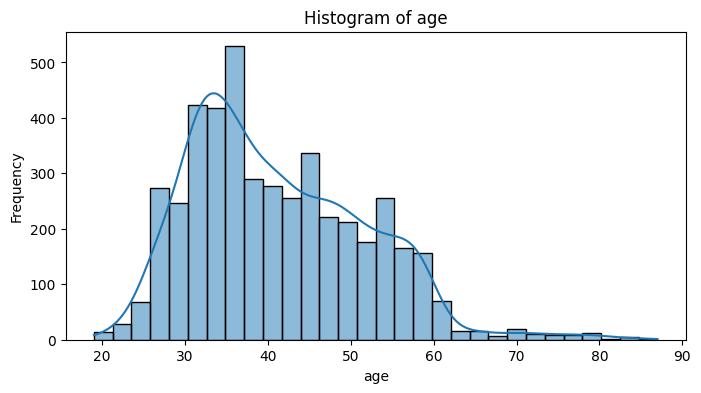

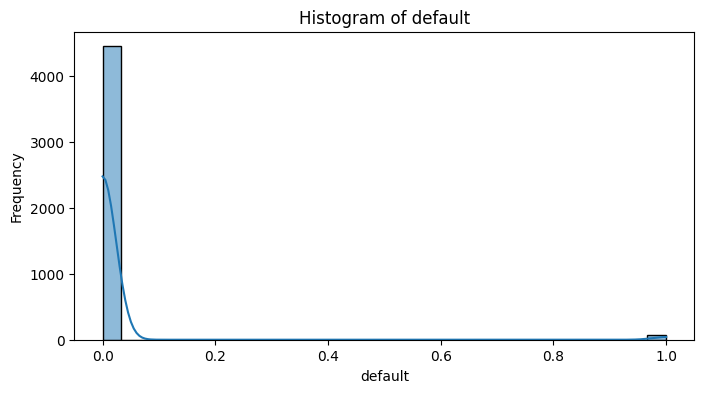

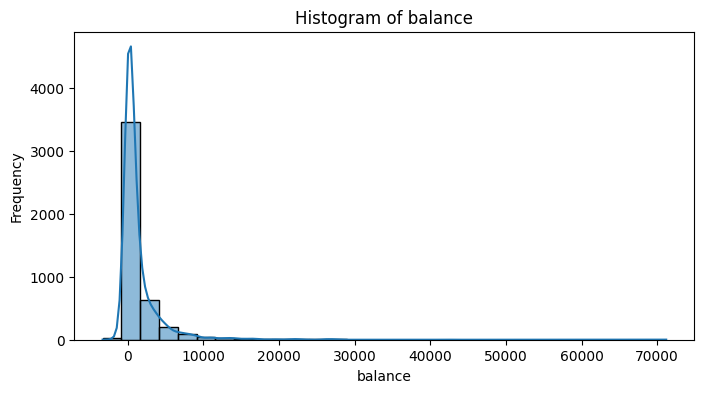

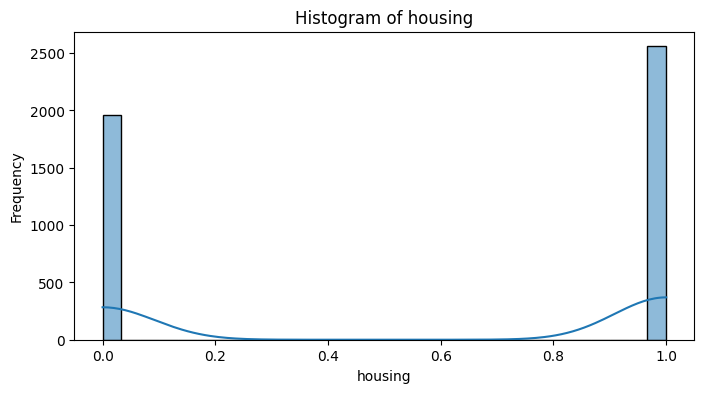

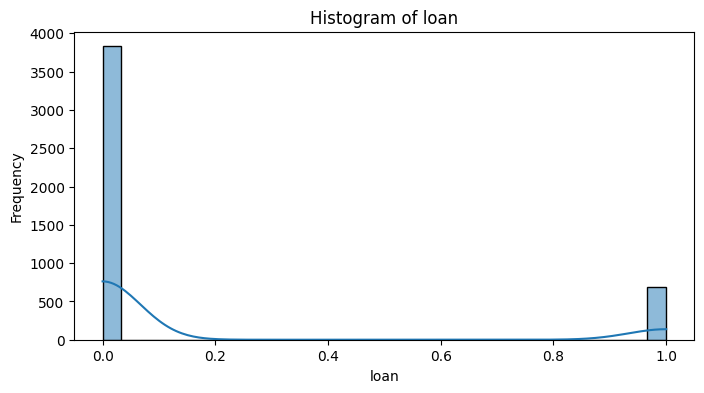

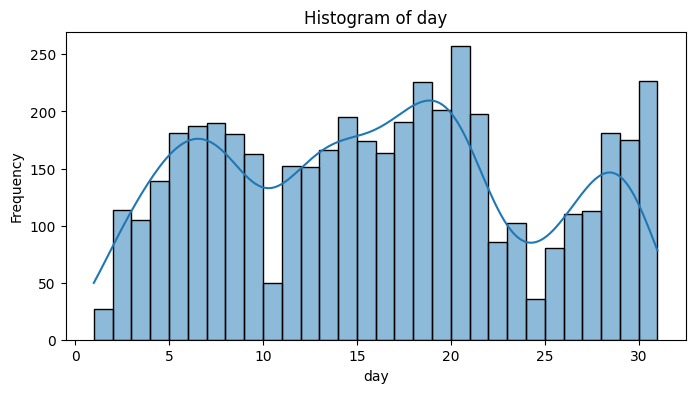

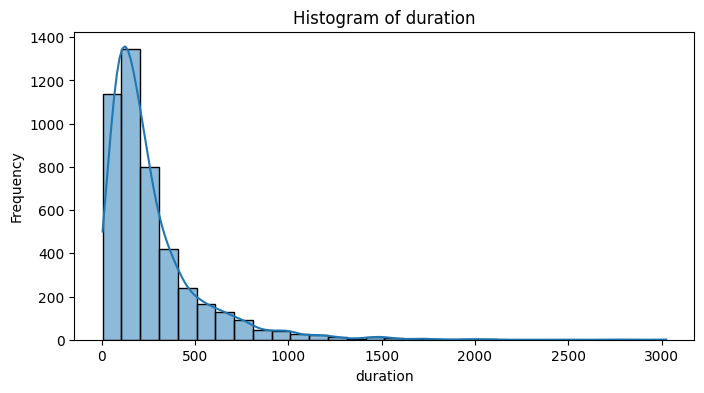

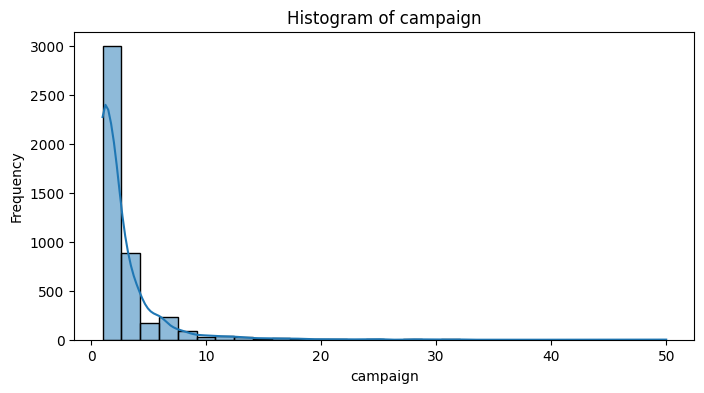

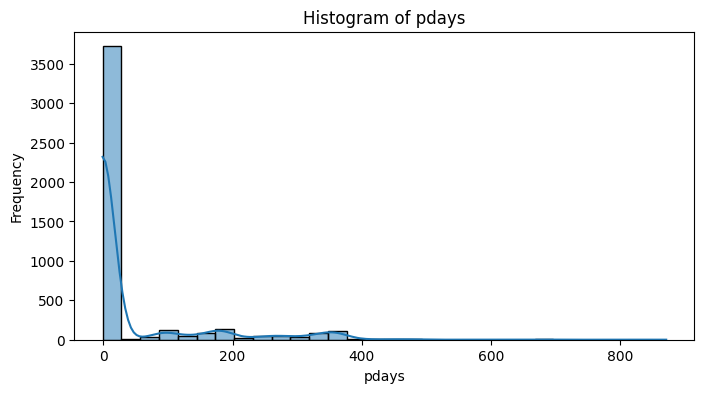

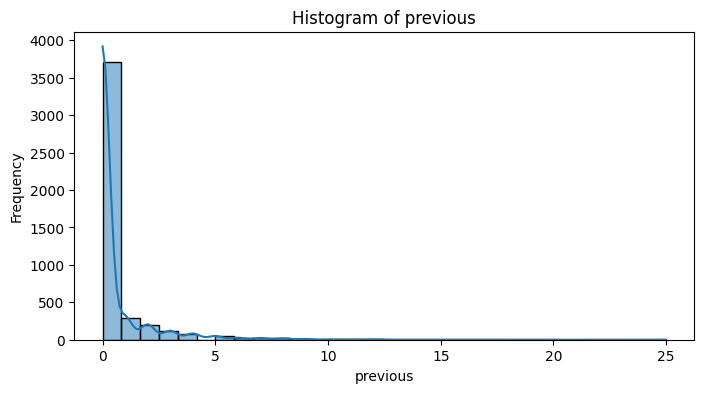

In [260]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Ensure the target variable 'y' is not included in numerical_cols
if 'y' in numerical_cols:
    numerical_cols.remove('y')

# Create histograms for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))  # Adjust figure size as needed
    sns.histplot(df[col].dropna(), bins=30, kde=True)  # Use histplot for histograms with KDE
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

#### Interpretation Notes: Numeric Histograms
- **`age`**:  
  - Distribution is slightly right-skewed, centered in the 30s–40s.  
  - The presence of a tail at younger ages (<25) indicates a smaller segment of younger customers.
  - Similarly, the tail at older ages (>60) represents a segment of older customers

- **`balance`** (average yearly account balance):  
  - Heavily right-skewed, with most clients near zero and a long positive tail.  
  - Outliers with very high balances may need log-scaling for clarity

- **`campaign`** (number of contacts in this campaign):  
  - Right-skewed — most clients contacted only a few times, but some many times.  
  - Higher values often indicate diminishing returns: repeated calls tend to reduce success probability [3].  
  - Useful for later feature engineering (e.g., grouping high vs. low contact counts).

- **`duration`** (last contact duration, in seconds):  
  - Strongly right-skewed, with a long tail.  
  - Longer calls are highly predictive of success — making this variable a classic case of **data leakage** [2][4].  
  - Good for exploratory analysis and understanding client behavior, but generally excluded from predictive models.
  
  

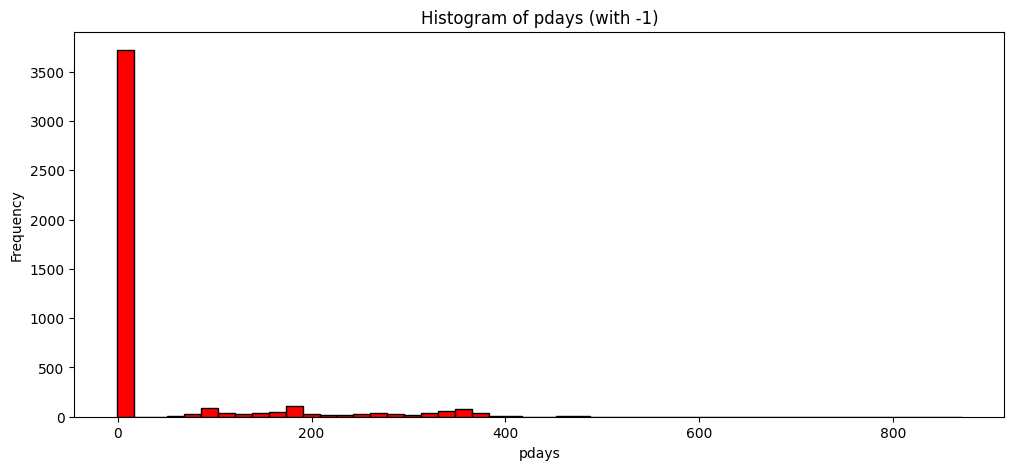

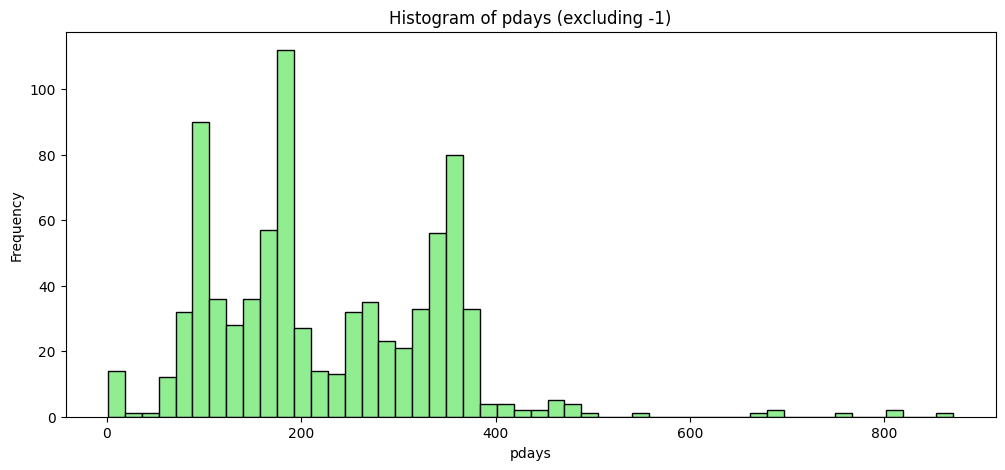

In [261]:
# Histogram including -1
plt.figure(figsize=(12,5))
plt.hist(df['pdays'], bins=50, color='red', edgecolor='black')
plt.title("Histogram of pdays (with -1)")
plt.xlabel("pdays")
plt.ylabel("Frequency")
plt.show()

# Histogram excluding -1
positive_pdays = df[df['pdays'] != -1]['pdays']
plt.figure(figsize=(12,5))
plt.hist(positive_pdays, bins=50, color='lightgreen', edgecolor='black')
plt.title("Histogram of pdays (excluding -1)")
plt.xlabel("pdays")
plt.ylabel("Frequency")
plt.show()

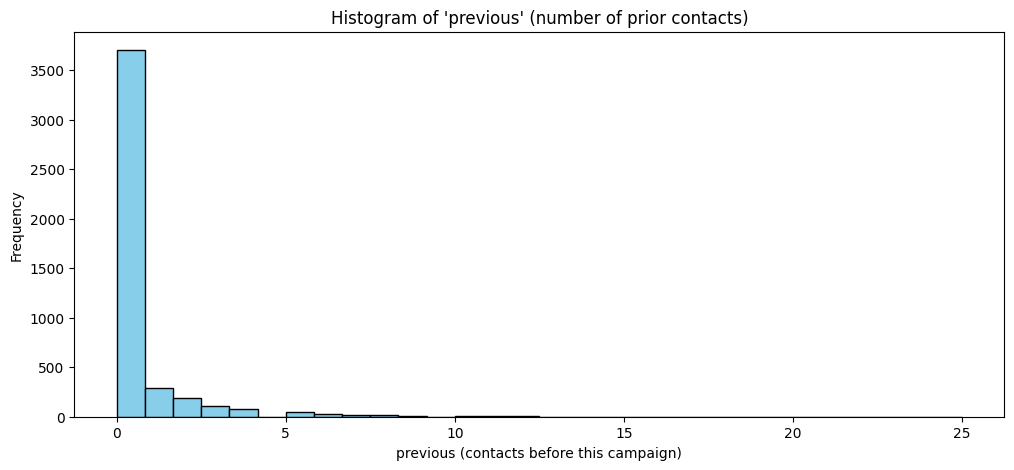

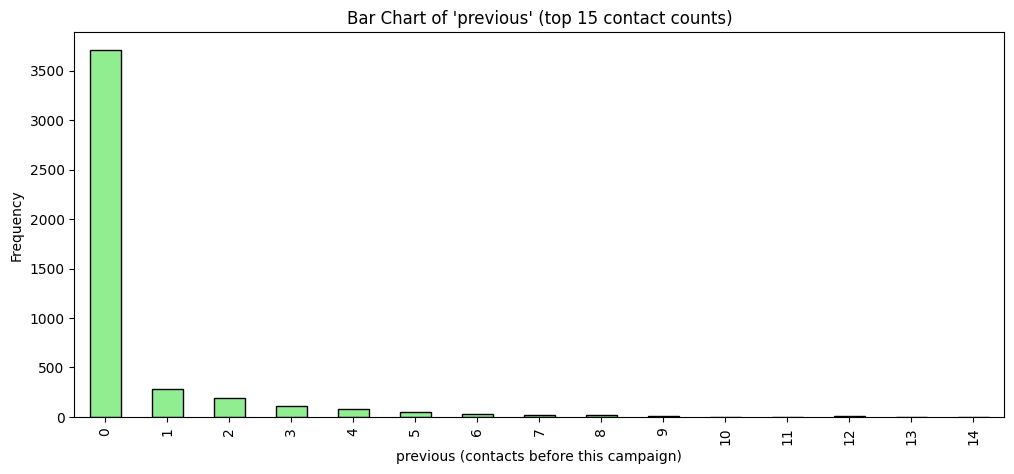

In [262]:
# Histogram for 'previous'
plt.figure(figsize=(12,5))
plt.hist(df['previous'], bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of 'previous' (number of prior contacts)")
plt.xlabel("previous (contacts before this campaign)")
plt.ylabel("Frequency")
plt.show()

# Bar chart for value counts (top 15 values)
plt.figure(figsize=(12,5))
df['previous'].value_counts().sort_index().head(15).plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Bar Chart of 'previous' (top 15 contact counts)")
plt.xlabel("previous (contacts before this campaign)")
plt.ylabel("Frequency")
plt.show()


#### Interpretation Notes: `pdays` & `previous` 

`pdays` & `previous`

- **`pdays`**: number of days since the client was last contacted from a previous campaign. 
  - The pdays column is dominated by -1, meaning most customers were not contacted previously.
  - Most frequent value: -1 → occurs 3705 times (~82%). 
  - A sentinel value (commonly 999 or –1) means *no prior contact*. Roughly 82% of records fall into that category.  
  - Some studies note that early re-contact (within ~14 days) may be linked to higher subscription rates [2][4].  

- **`previous`**: number of contacts performed before this campaign for a client.
  - The column is heavily skewed towards 0, meaning most customers had no prior contacts before the current campaign 
  - Majority (~82%) of clients had no prior contacts [2].  
  - Higher values don’t always predict better outcomes, but moderate prior exposure can correlate with slightly improved conversions [2][3].  

- **Together**: these variables both capture client “exposure history.”  
  - Researchers sometimes combine them into a single binary feature — e.g., *“ever contacted before”* — to simplify modeling and reduce overlap [3].

#### Boxplots: Numeric Features by Target (`y`)

These plots show how each numeric feature differs between clients who subscribed (`yes`) and those who didn’t (`no`); look for shifts in medians, spread, and overlap.

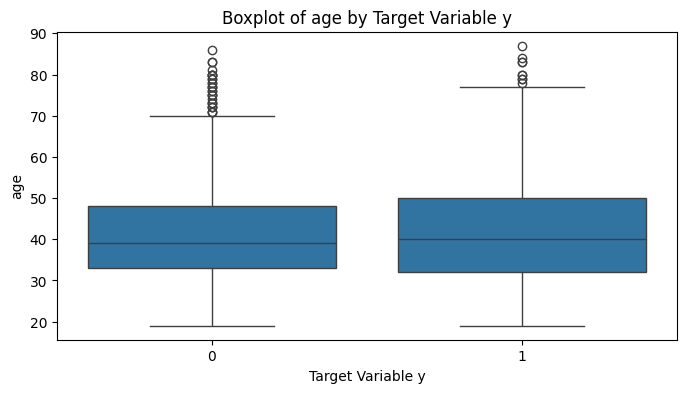

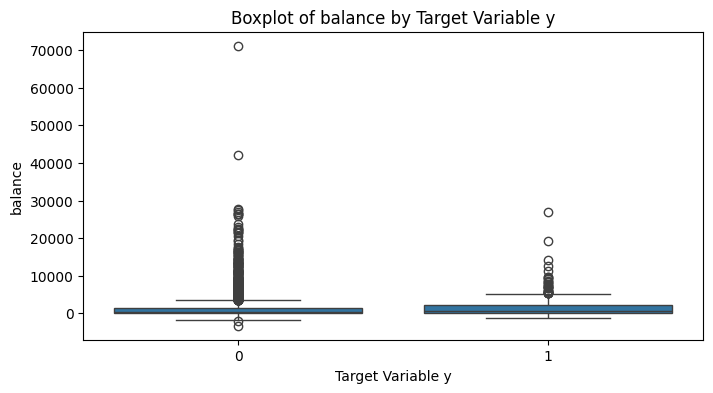

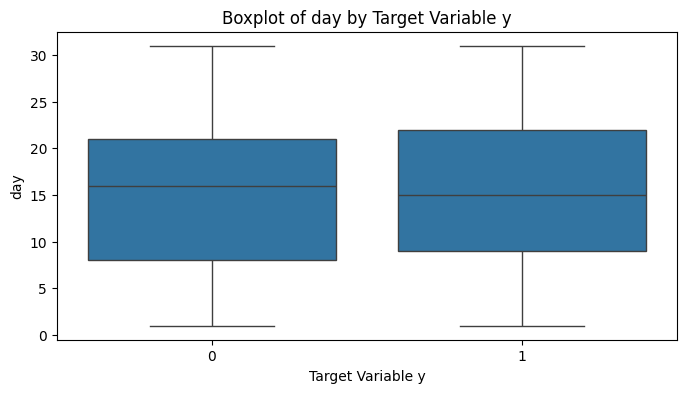

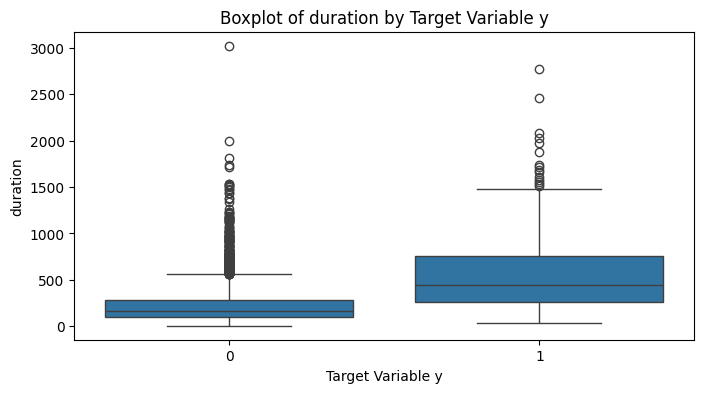

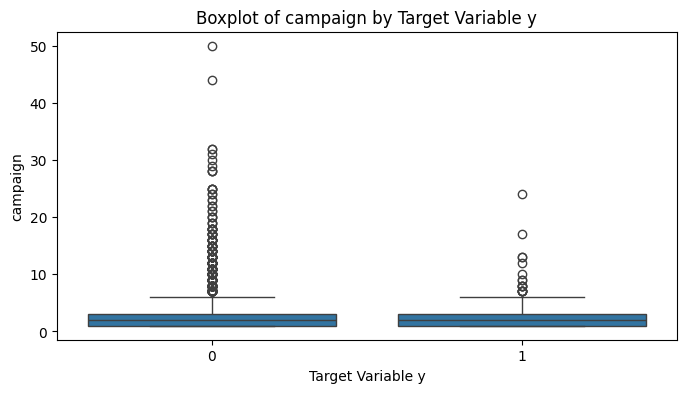

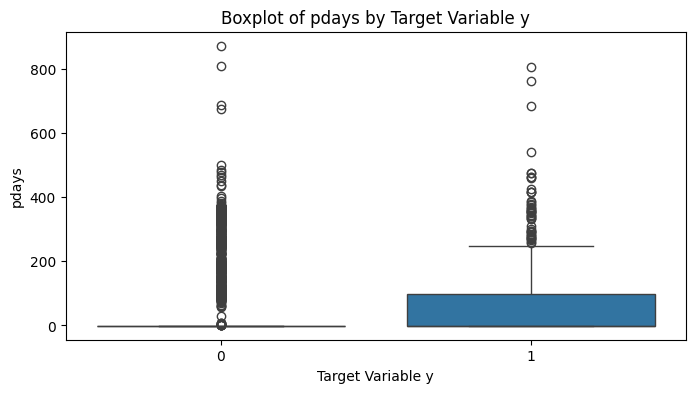

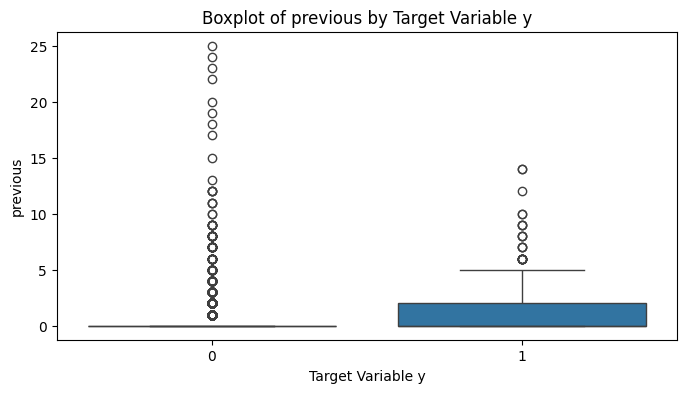

In [263]:
# Boxplots - numeric split by target y
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='y', y=col, data=df)
    plt.title(f"Boxplot of {col} by Target Variable y")
    plt.xlabel("Target Variable y")
    plt.ylabel(col)
    plt.show()


`duration` Boxplot:
- If the median "duration" is significantly higher for y=1, it suggests that longer call durations are strongly associated with subscription. This is a common finding and might indicate data leakage (as mentioned in your notes).

`age` Boxplot:
- If the median "age" is slightly higher for y=1, it suggests that slightly older customers are more likely to subscribe.
- If the IQR for "age" is wider for y=0, it suggests that the age of non-subscribers is more variable.

`balance` Boxplot:
- If the median "balance" is higher for y=1, it suggests that customers with higher balances are more likely to subscribe.
- If there are more outliers with very high balances for y=1, it suggests that high-net-worth individuals are more likely to subscribe.

`campaign` Boxplot:
- If the median "campaign" is lower for y=1, it suggests that customers who are contacted fewer times are more likely to subscribe. This supports the idea of diminishing returns from repeated calls.

`pdays` and `previous` Boxplots:
- These can be tricky to interpret due to the large number of -1 values. You might need to create separate boxplots for customers who were previously contacted (pdays != -1) to get meaningful insights.

Understanding the Problem:

- `pdays` = -1: This means the customer was not contacted in a previous campaign.
- `previous` = 0: This also means the customer was not contacted in a previous campaign.
The -1 in pdays is essentially acting as a placeholder or sentinel value for "not contacted." Because a large portion of your data has these values, the boxplots are compressed and it's hard to see any meaningful differences between the 'y=0' and 'y=1' groups.

Solutions for Better Interpretation:
- `Create a Binary "Ever Contacted" Feature`:
   - This is a common and often effective approach. Create a new feature (e.g., ever_contacted) that is 1 if pdays != -1 and 0 if pdays == -1. Or, similarly, 1 if previous > 0 and 0 if previous == 0.
   - Then, create a bar chart or count plot of ever_contacted vs. y to see if  there's a relationship. A chi-squared test can confirm statistical significance.
- `Create Separate Boxplots for Contacted Customers Only`:
   - Filter the DataFrame to include only customers who were contacted previously (pdays != -1).
   - Then, create boxplots of pdays and previous (using the filtered data) split by the target variable y. This will give you a clearer picture of how the number of days since last contact or the number of previous contacts affects subscription rates for those who were actually contacted.




- Key Considerations:

Statistical Significance: Visual differences in boxplots don't always mean the differences are statistically significant. You might want to perform statistical tests (e.g., t-tests or Mann-Whitney U tests) to confirm whether the differences are significant.
Data Leakage: Be cautious about features like "duration" that might be highly predictive of the target variable but are not available at the time of prediction.
Feature Interactions: Boxplots only show the relationship between one feature and the target variable. Consider how combinations of features might influence the target variable.
In summary, boxplots are a valuable tool for visualizing the relationship between numerical features and a categorical target variable. By comparing the medians, variability, and outliers for each group, you can gain insights into which features are most strongly associated with the target variable. Remember to consider statistical significance and the potential for data leakage when interpreting the results.

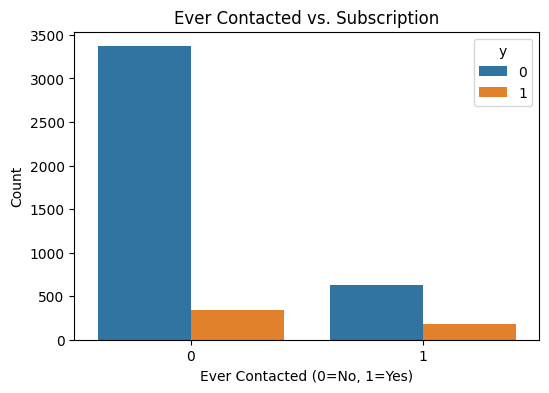

In [264]:
df['ever_contacted'] = df['pdays'].apply(lambda x: 0 if x == -1 else 1)  # Or use df['previous'] > 0
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='ever_contacted', hue='y', data=df)
plt.title('Ever Contacted vs. Subscription')
plt.xlabel('Ever Contacted (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

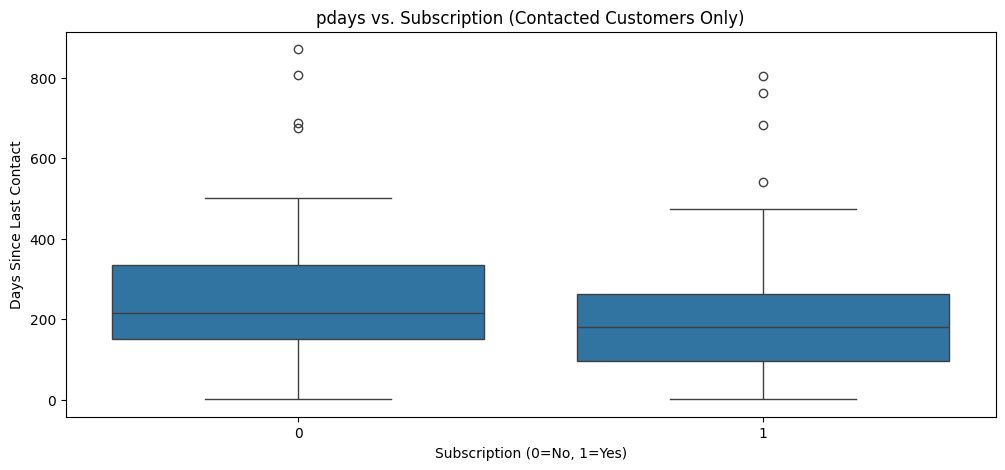

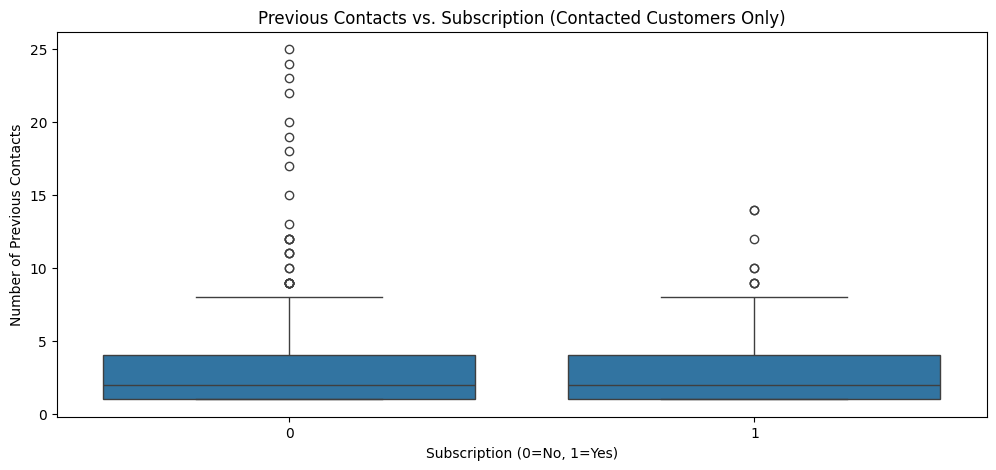

In [265]:
contacted = df[df['pdays'] != -1]  # Filter for contacted customers

plt.figure(figsize=(12, 5))
sns.boxplot(x='y', y='pdays', data=contacted)
plt.title('pdays vs. Subscription (Contacted Customers Only)')
plt.xlabel('Subscription (0=No, 1=Yes)')
plt.ylabel('Days Since Last Contact')
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x='y', y='previous', data=contacted)
plt.title('Previous Contacts vs. Subscription (Contacted Customers Only)')
plt.xlabel('Subscription (0=No, 1=Yes)')
plt.ylabel('Number of Previous Contacts')
plt.show()

In [266]:
# Summary statistics by class
from scipy.stats import iqr

numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
print(numerical_cols)

agg_map = {col: ["median", "mean", iqr] for col in numerical_cols}
summary = df.groupby("y").agg(agg_map).round(2)
summary.columns = [f"{col}_{stat}" for col, stat in summary.columns]

def stat_table(summary, stat: str):
    cols = [c for c in summary.columns if c.endswith(f"_{stat}")]
    out = summary[cols].copy()
    out.columns = [c.rsplit("_", 1)[0] for c in out.columns]   # drop _median suffix etc.
    return out

median_tbl = stat_table(summary, "median").reindex([0,1])
mean_tbl   = stat_table(summary, "mean").reindex([0,1])
iqr_tbl    = stat_table(summary, "iqr").reindex([0,1])

print("Medians by class:")
display(median_tbl)

print("Means by class:")
display(mean_tbl)

print("IQR by class:")
display(iqr_tbl)

['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y', 'ever_contacted']
Medians by class:


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,ever_contacted
y,,,,,,,,,,,,
0,39.0,0.0,419.5,1.0,0.0,16.0,167.0,2.0,-1.0,0.0,0.0,0.0
1,40.0,0.0,710.0,0.0,0.0,15.0,442.0,2.0,-1.0,0.0,1.0,0.0


Means by class:


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,ever_contacted
y,,,,,,,,,,,,
0,41.00,0.02,1403.21,0.58,0.16,15.95,226.35,2.86,36.01,0.47,0.0,0.16
1,42.49,0.02,1571.96,0.42,0.08,15.66,552.74,2.27,68.64,1.09,1.0,0.35


IQR by class:


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,ever_contacted
y,,,,,,,,,,,,
0,15.0,0.0,1346.0,1.0,0.0,13.0,187.0,2.0,0.0,0.0,0.0,0.0
1,18.0,0.0,1989.0,1.0,0.0,13.0,495.0,2.0,99.0,2.0,0.0,1.0


#### Summary of Numeric Features by Target (`y`) 

**Age**
- Median: no = 39, yes = 40 → very similar.
- Mean: slightly higher for yes (42.49 vs 41).
- IQR: wider for yes (18 vs 15) → age range among subscribers is a bit more spread out.

**Balance**
- Median: higher for yes (710 vs 419).
- Mean: higher for yes (1571.96 vs 1403.21), but large IQRs (1989.0 vs 1346.0) show heavy skew.
- Takeaway: Balance may add some signal, but extreme outliers could dominate.

**Day of month**
- Medians almost identical (16 vs 15).
- Means and IQRs close → likely little predictive value.

**Duration (last call length)**
- Median: yes much higher (442 vs 167).
- Mean: yes more than double (552.74 vs 226.35).
- IQR: yes more than double (495.0 vs 187).
- Clear separation → but a **leakage variable** (reflects campaign outcome). Good for EDA, exclude from modeling.

**Campaign (contacts in this campaign)**
- Median: equal (2).
- Mean: higher for no (2.86 vs 2.27).
- Takeaway: More calls are associated with lower success (diminishing returns effect).

**Pdays (days since last contact)**
- Median = -1 for both → sentinel value dominates.
- Mean: higher for yes (68.64	 vs 36.01), IQR for yes = 99 → only a small subset has meaningful values.
- Takeaway: Needs filtering (exclude sentinel) or transformation (e.g., binary “previously contacted”).

**Previous (prior contacts before this campaign)**
- Median = 0 for both.
- Mean: higher for yes (1.09 vs 0.47), IQR for yes = 2 → most clients weren’t contacted before, but a few prior contacts may boost odds.
---


#### Countplots: Categorical Features by Target (`y`)  
These plots show how each categorical feature breaks down by subscribed (`yes`) vs. not subscribed (`no`).  
Look for categories where the share of `yes` is relatively higher, even though `no` dominates overall.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             4521 non-null   int64 
 1   job             4521 non-null   object
 2   marital         4521 non-null   object
 3   education       4521 non-null   object
 4   default         4521 non-null   int64 
 5   balance         4521 non-null   int64 
 6   housing         4521 non-null   int64 
 7   loan            4521 non-null   int64 
 8   contact         4521 non-null   object
 9   day             4521 non-null   int64 
 10  month           4521 non-null   object
 11  duration        4521 non-null   int64 
 12  campaign        4521 non-null   int64 
 13  pdays           4521 non-null   int64 
 14  previous        4521 non-null   int64 
 15  poutcome        4521 non-null   object
 16  y               4521 non-null   int64 
 17  ever_contacted  4521 non-null   int64 
dtypes: int64

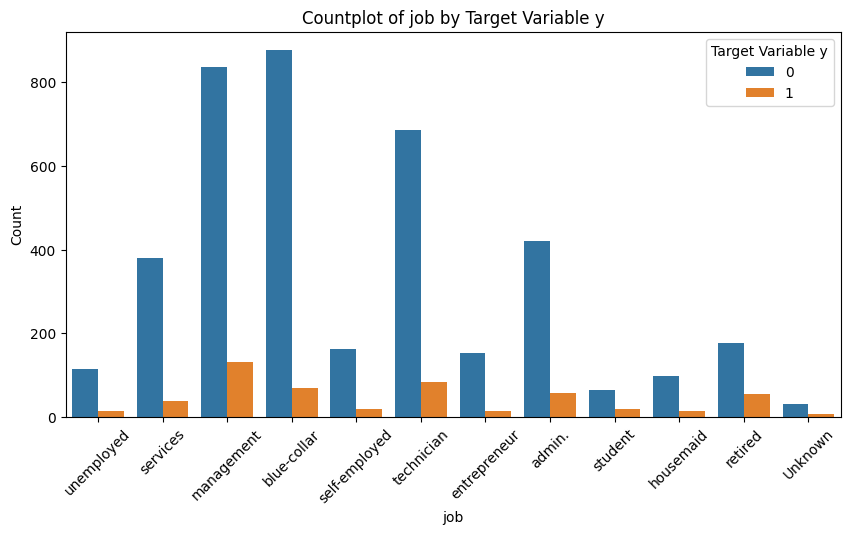

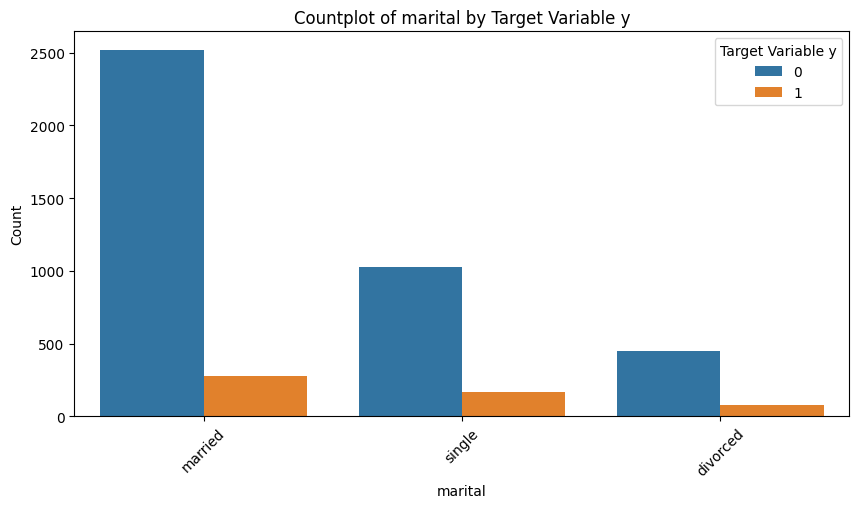

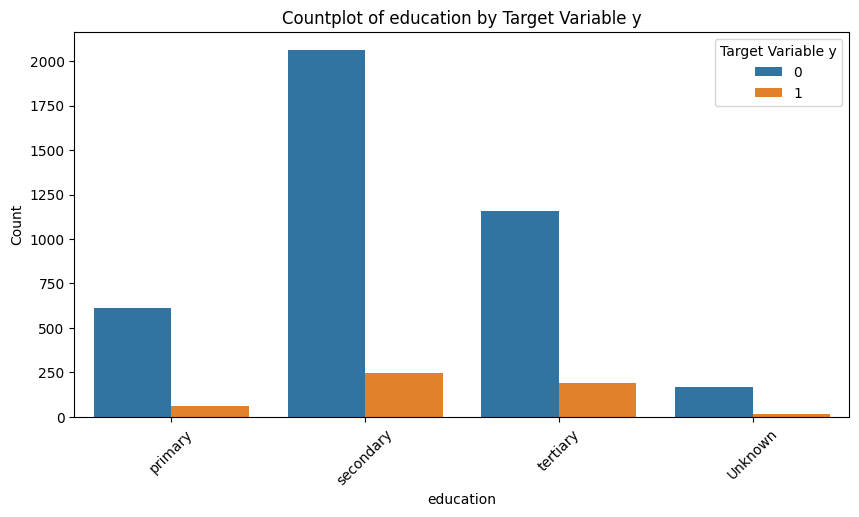

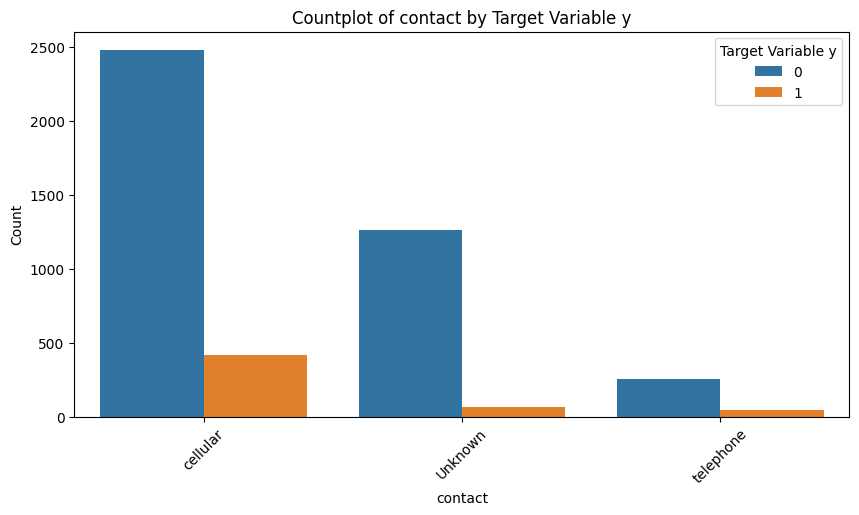

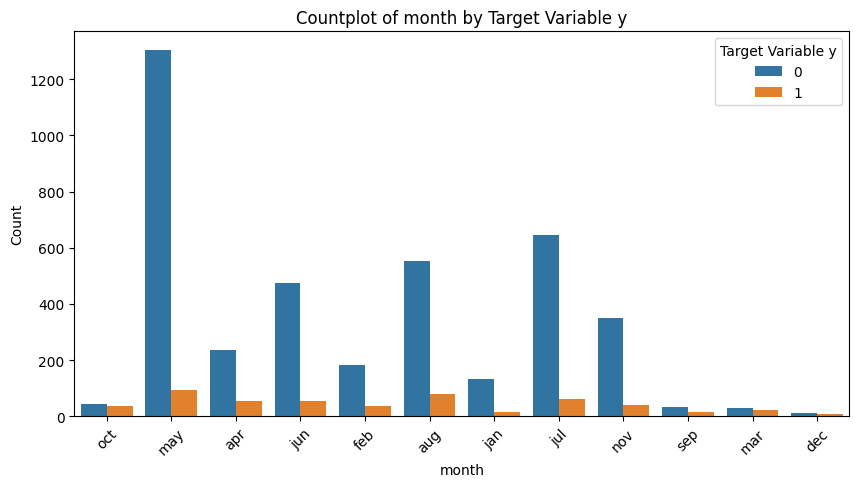

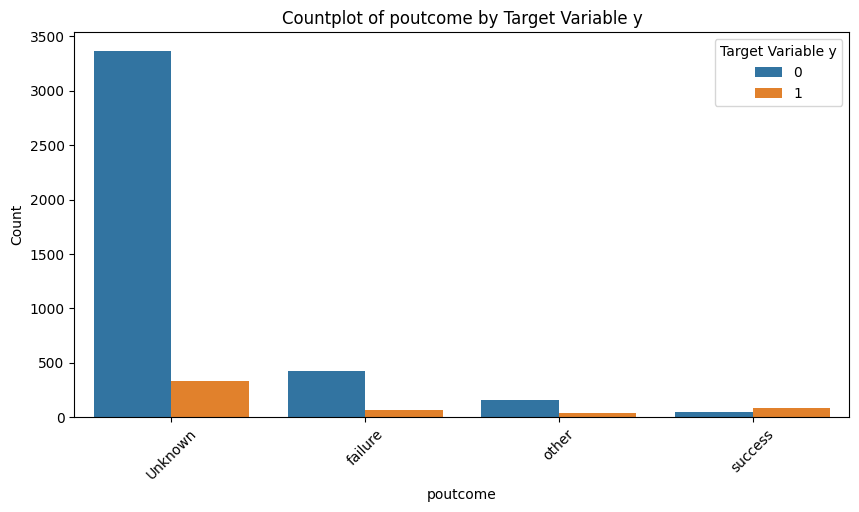

In [267]:
# Countplots - how each categorical feature differs by target y
print(df.info())
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ["job", "marital", "education", "contact", "month", "poutcome"]
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, hue='y', data=df)
    plt.title(f"Countplot of {col} by Target Variable y")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title='Target Variable y')
    plt.show()  

- `Class imbalance across jobs`

   - For every job category, the number of non-subscribers (y=0, blue bars) is much higher than  subscribers (y=1, orange bars).

   - This shows the dataset is imbalanced (fewer “yes” responses overall).

- `Jobs with high counts but low success`

   - Management, blue-collar, technician, services have the highest total counts.

   - Even though they dominate the dataset, their subscriber counts (orange) are relatively low  compared to their population size.
   - → These groups have a low conversion rate.

- `Jobs with fewer people but relatively more success`

   - For retired, students, unemployed, even though the orange bar is smaller than the blue one, the relative proportion of orange-to-blue is higher compared to jobs like management or blue-collar.

   - Even though the total number of people in these groups is small, their likelihood to subscribe is higher.

- `Unknown job`

   - Very few people fall into this category, so it may not be meaningful for prediction but could be noise.

#### Quick takeaways  
- **Job**: Retired clients show a higher proportion of `yes`; management, technician, and blue-collar dominate in volume but skew to `no`.  
- **Marital**: Singles convert slightly better than married or divorced.  
- **Education**: Tertiary education shows a modestly higher share of `yes`.  
- **Default**: Mostly “no”; little difference between “no” and “unknown.”  
- **Housing**: Clients without housing loans lean slightly more toward `yes`.  
- **Loan**: Majority “no”; conversion rates similar across categories.  
- **Contact**: Cellular contacts outperform telephone.  
- **Month**: May dominates volume but has lower success; October/December show better `yes` ratios, though smaller samples.  
- **Poutcome**: “Unknown” is most frequent; prior “success” strongly correlates with new `yes`.

**Interpretation**  
- Categorical features mirror the overall imbalance, but specific groups (retired, tertiary-educated, single, cellular contact, prior success) show stronger signals worth testing in modeling.
---

#### Note on data preparation  

At this stage, the dataset is being explored **as-is**.  
- Categorical features (e.g., `job`, `education`, `marital`, `default`) still contain `"unknown"` values.  
- `"unknown"` is being treated as a valid category during EDA so its frequency and impact can be observed directly in plots.  
- No one-hot/dummy encoding has been applied yet — that step will come later during model preparation.  

This approach allows for full visibility into how `"unknown"` behaves before deciding whether it should remain as a separate category or be handled differently during modeling.

#### Handling of "unknown" values 

Several features in this dataset include "unknown" as a category (e.g., `job`, `education`, `marital`, `default`).  
Instead of dropping rows or trying to impute values, I will **retain "unknown" as its own category**.  -

Reasons for this choice:
- Preserves the full dataset size without removing clients.
- Avoids assumptions about why information is missing.
- Lets modeling later determine whether "unknown" itself carries predictive value.  

If "unknown" proves unhelpful (or noisy), I can revisit and collapse it into the majority category or drop those rows.  
For now, keeping it explicit provides the cleanest path forward.


#### Example: One-hot Encoding with "unknown"

- When categorical features are prepared for modeling, one-hot (dummy) encoding expands each category into its own column.  
For example, if the `education` column contains:  

| education   |
|-------------|
| primary     |
| secondary   |
| tertiary    |
| unknown     |

- After one-hot encoding, it becomes:  

| education_primary | education_secondary | education_tertiary | education_unknown |
|-------------------|---------------------|--------------------|-------------------|
| 1                 | 0                   | 0                  | 0                 |
| 0                 | 1                   | 0                  | 0                 |
| 0                 | 0                   | 1                  | 0                 |
| 0                 | 0                   | 0                  | 1                 |

- This way, `"unknown"` is treated as a valid category. The model can then learn whether the `"unknown"` indicator is predictive.  
If it turns out to be unhelpful, the dummy column `education_unknown` can later be dropped without changing the rest of the pipeline.
---

#### Stacked (side-by-side) counts - categorical x y

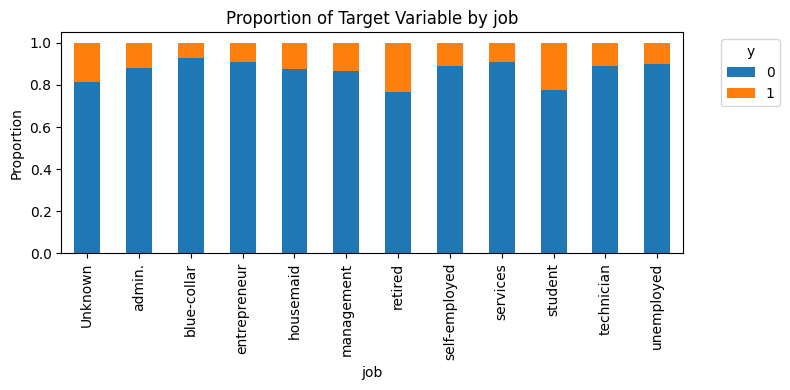

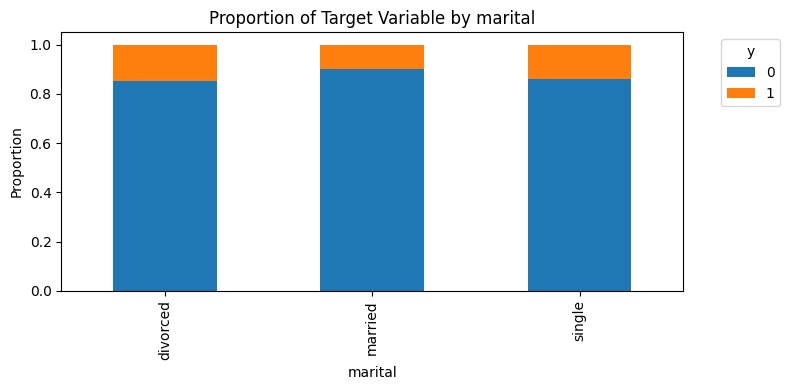

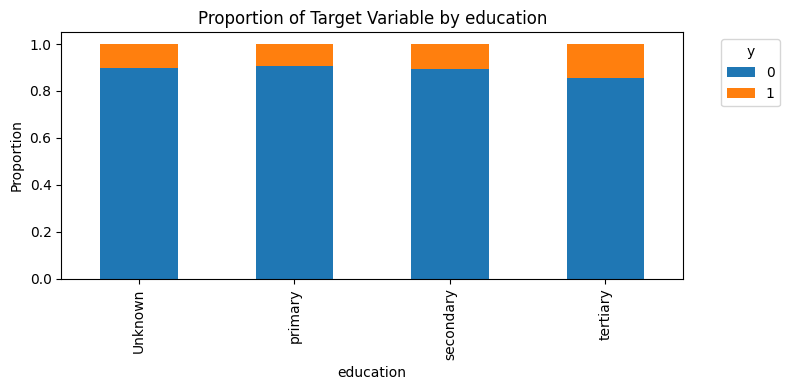

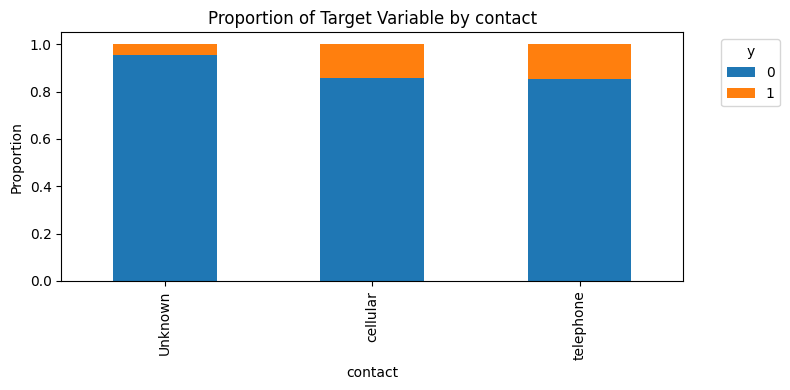

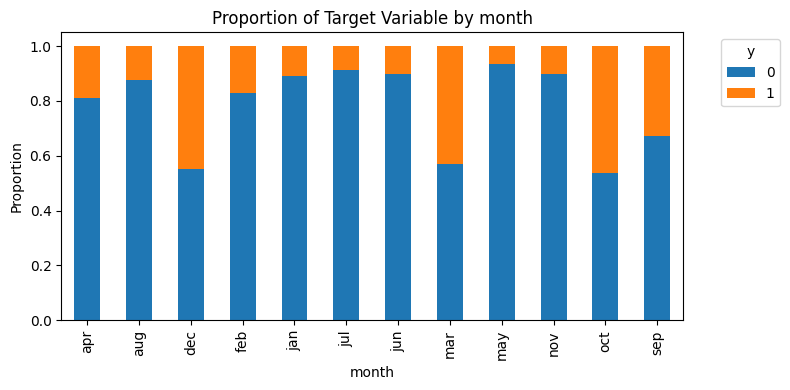

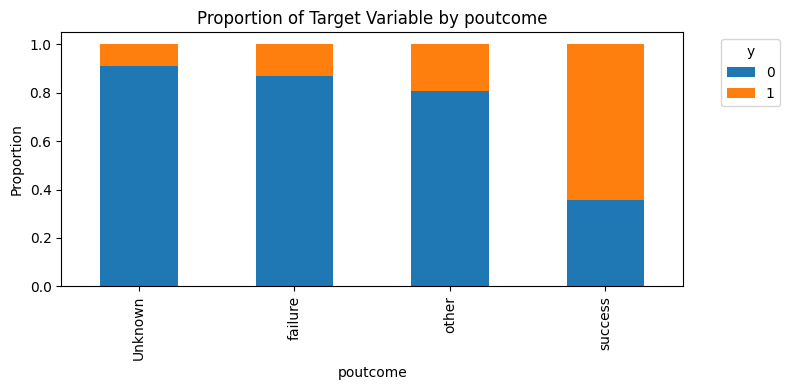

In [268]:
# Stacked side-by-side counts - categorical features by target
import matplotlib.pyplot as plt

for col in categorical_cols:
	ct = (
		df.groupby([col, "y"]).size()
		.unstack(fill_value=0)
		.apply(lambda x: x / x.sum(), axis=1)  # normalize by row (category)
	)
	ct.plot(kind="bar", stacked=True, figsize=(8, 4))
	plt.title(f"Proportion of Target Variable by {col}")
	plt.xlabel(col)
	plt.ylabel("Proportion")
	plt.legend(title="y", bbox_to_anchor=(1.05, 1), loc='upper left')
	plt.tight_layout()
	plt.show()


For each categorical feature:

You’ll get a stacked bar chart where each bar = one category (e.g., job type).

Bar is divided into proportions of non-subscribers (y=0) and subscribers (y=1).

This helps you compare subscription rates across categories directly, instead of comparing raw counts.

#### Target Class Imbalance (`y`)

Here, we check the distribution of the target variable (`yes` vs `no`).  
This helps confirm if imbalance-handling techniques (e.g., SMOTE, class weights) will be required.  


Class counts:
 y
0    4000
1     521 

Class proportions:
 y
0    0.885
1    0.115 



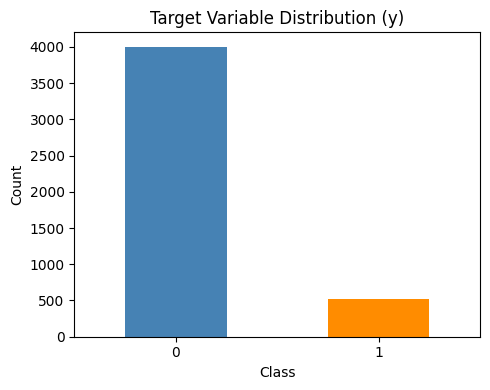

In [269]:
# Target variable class imbalance
import matplotlib.pyplot as plt
import pandas as pd

# Count values
class_counts = df["y"].value_counts()
class_props = df["y"].value_counts(normalize=True)

# Print counts and proportions
print("Class counts:\n", class_counts.to_string(), "\n")
print("Class proportions:\n", class_props.round(3).to_string(), "\n")

# Plot
fig, ax = plt.subplots(figsize=(5,4))
class_counts.plot(kind="bar", color=["steelblue", "darkorange"], ax=ax)
ax.set_title("Target Variable Distribution (y)")
ax.set_xlabel("Class")
ax.set_ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()  



### Results: Target Class Imbalance  

- The dataset is **highly imbalanced**:  
  - **No:** 4000 clients (88.4%)  
  - **Yes:** 521 clients (11.5%)  
- This skew means a naïve model could achieve ~88% accuracy by always predicting “no.”  
- Handling strategies: **SMOTE, undersampling, or class weights** will be essential to train a balanced model.  
---


### Safe vs. Leaky Features Checklist  

**Safe features (can be used in training):**  
- **Demographics**: `age`, `job`, `marital`, `education`  
- **Financial context**: `balance`, `housing`, `loan`, `default`  
- **Campaign metadata**: `contact`, `day`, `month`, `campaign`, `pdays`, `previous`, `poutcome`  
  - *Note:* `pdays = 999` usually indicates “no previous contact”  

**Leaky features (avoid using in training):**  
- **`duration`** – call length; only known *after* the call ends — introduces target leakage by providing post-outcome data.  
- Any feature observed *after* or influenced *by* the outcome — essentially giving the model “an answer key” it wouldn’t have in production.  

**Rule of thumb:**  
 - If we **wouldn’t know it at prediction time**, it’s leaky. 
 - Including it creates overly optimistic performance that fails in real-world use.  

**Takeaway:**  
- `duration` looks powerful in correlation, but it’s a textbook case of data leakage. 
- Flagging and excluding it keeps the model honest and ensures performance will generalize in real-world predictions.  

### References  

- IBM. *Data Leakage in Machine Learning*. IBM Think Topics.  
  [https://www.ibm.com/think/topics/data-leakage-machine-learning](https://www.ibm.com/think/topics/data-leakage-machine-learning)  

- Wikipedia. *Leakage (machine learning)*.  
  [https://en.wikipedia.org/wiki/Leakage_(machine_learning)](https://en.wikipedia.org/wiki/Leakage_(machine_learning))  

- ActiveViam (Atoti). *What is data leakage and how to mitigate it?*  
  [https://www.atoti.activeviam.com/articles/what-is-data-leakage-and-how-to-mitigate-it/](https://www.atoti.activeviam.com/articles/what-is-data-leakage-and-how-to-mitigate-it/)  

- Airbyte. *What is Data Leakage?*  
  [https://airbyte.com/data-engineering-resources/what-is-data-leakage](https://airbyte.com/data-engineering-resources/what-is-data-leakage)  

---

In [270]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler

# # Select numerical columns and drop leakage feature `duration`)
# numerical_cols = ["age", "balance", "day", "campaign", "pdays", "previous"]

# # Before scaling: look at descriptive stats
# print("Before Scaling:\n")
# print(df[numerical_cols].describe().T[["mean", "std", "min", "max"]])

# # Apply StandardScaler
# scaler = StandardScaler()
# scaled = scaler.fit_transform(df[numerical_cols])

# # Put into a DataFrame
# scaled_df = pd.DataFrame(scaled, columns=numerical_cols)

# # After scaling: stats again
# print("\nAfter Scaling:\n")
# print(scaled_df.describe().T[["mean", "std", "min", "max"]])


In [271]:
cat_cols=['job','marital','education','contact','month','poutcome']
# for col in cat_cols:
#     df[col]=df[col].replace('unknown','Unknown')m
print(df['month'].unique())   
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")

for col in cat_cols:
    print(f"{col} value counts:\n{df[col].value_counts()}")

['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
job: 12 unique values
marital: 3 unique values
education: 4 unique values
contact: 3 unique values
month: 12 unique values
poutcome: 4 unique values
job value counts:
job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
Unknown           38
Name: count, dtype: int64
marital value counts:
marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64
education value counts:
education
secondary    2306
tertiary     1350
primary       678
Unknown       187
Name: count, dtype: int64
contact value counts:
contact
cellular     2896
Unknown      1324
telephone     301
Name: count, dtype: int64
month value counts:
month
may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct   

In [272]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

cat_cols_OneHotEncode=['job','marital','education','contact','month','poutcome']
numerical_cols = ["age", "balance", "day", "campaign", "pdays", "previous"]

cat_cols_labelEncode=['default','housing','loan']

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

feature_cols = cat_cols_OneHotEncode + cat_cols_labelEncode + numerical_cols

ct = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols_OneHotEncode)
          # actual scaling during transformation
    ],
    remainder='passthrough'
)

X_transformed = ct.fit_transform(df[feature_cols])
Y = df['y'].values

print("Original shape:", x.shape)
print("Transformed shape:", X_transformed.shape)
print("Result type:", type(X_transformed))

# Preview first 5 transformed rows
print("\nSample of transformed data (first 5 rows):")
print(X_transformed[:5])

feature_names = ct.get_feature_names_out()

print("Transformed feature names:\n", feature_names)
print("\nTransformed data shape:", X_transformed.shape)

print(X_transformed.shape, y.shape)

# print("Encoded values:", y[:15])
#print(x.isnull().sum())


Original shape: (4521, 17)
Transformed shape: (4521, 41)
Result type: <class 'numpy.ndarray'>

Sample of transformed data (first 5 rows):
[[ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  1.000e+00  1.000e+00
   0.000e+00  1.000e+00  0.000e+00  0.000e+00  1.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  1.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  3.000e+01
   1.787e+03  1.900e+01  1.000e+00 -1.000e+00  0.000e+00]
 [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  1.000e+00  0.000e+00  0.000e+00  0.000e+00  1.000e+00
   0.000e+00  0.000e+00  1.000e+00  0.000e+00  1.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  1.000e+00  0.000e+00  0.000e+00  0.000e+00  1.000e+00
   0.000e+00  0.000e+00  0.000e+00  1.000e+00  1.000e+00

In [273]:
num_cols = ['remainder__age','remainder__balance','remainder__day',
            'remainder__campaign','remainder__pdays','remainder__previous']

# Suppose feature_names is the list you got from ct.get_feature_names_out()
indices = [list(feature_names).index(col) for col in num_cols]
print(indices)

[35, 36, 37, 38, 39, 40]


In [274]:
# print(x.dtype)
# num_cols = ['remainder__age','remainder__balance','remainder__day',
#             'remainder__campaign','remainder__pdays','remainder__previous']

# # Suppose feature_names is the list you got from ct.get_feature_names_out()
# indices = [list(feature_names).index(col) for col in num_cols]
# print(indices)


#### Stratified split into train (70%), val (15%), test (15%)

In [275]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, test_size=0.2, random_state=42, stratify=Y)

# Stratified split into train (70%), val (15%), test (15%)

X_train, X_tmp, y_train, y_tmp = train_test_split(
    X_transformed,                  # Training features 
    y,                  # Target variable
    test_size=0.30,     # 30% for validation and test
    stratify=y,         # Stratify by target variable
    random_state=42     # reproducibility: ensures same split and same output each run, as long as nothing else changes
)
X_val, X_test, y_val, y_test = train_test_split(
    X_tmp,              # Temporary features
    y_tmp,              # Temporary target variable
    test_size=0.50,     # 50% for test
    stratify=y_tmp,     # Stratify by temporary target variable
    random_state=42     
)

# Quick check of shapes (should be ~70/15/15 split)
print("Train/Val/Test:", X_train.shape, X_val.shape, X_test.shape)


Train/Val/Test: (3164, 41) (678, 41) (679, 41)


#### Scale numeric features
- Use StandardScaler or MinMaxScaler as appropriate
- Fit on train only, transform train/test
- Check distributions post-scaling
- Save scalers for later use
- Check for data leakage
- Ensure no information from val/test leaks into train

In [276]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on training numeric features only
X_train[:, 35:] = scaler.fit_transform(X_train[:, 35:])
X_val[:, 35:]   = scaler.transform(X_val[:, 35:])
X_test[:, 35:]  = scaler.transform(X_test[:, 35:])

### Verify scaling worked

In [277]:
print("Train numeric feature means after scaling:")
print(X_train[:, 35:].mean().round(6))

print("\nTrain numeric feature std after scaling:")
print(X_train[:, 35:].std().round(6))

Train numeric feature means after scaling:
-0.0

Train numeric feature std after scaling:
1.0


In [278]:
import pandas as pd

# Ensure tabulate is installed for to_markdown()
%pip install tabulate

# Assuming numeric features start at column index 35
num_start_idx = 35
num_feature_names = num_cols  # reuse the list you already have

# Convert NumPy slices to DataFrames
df_train_num = pd.DataFrame(X_train[:, num_start_idx:], columns=num_feature_names)
df_val_num   = pd.DataFrame(X_val[:, num_start_idx:], columns=num_feature_names)
df_test_num  = pd.DataFrame(X_test[:, num_start_idx:], columns=num_feature_names)

# Summary stats
def summary_stats(df, split_name):
    stats = (
        df.describe()
          .T
          .loc[:, ['count','mean','std','min','25%','50%','75%','max']]
          .rename_axis('Feature')
          .reset_index()
          .round(3)
    )
    print(f"\n📊 {split_name} set stats:")
    display(stats)
    print(stats.to_markdown(index=False))

summary_stats(df_train_num, "Train")
summary_stats(df_val_num, "Validation")
summary_stats(df_test_num, "Test")


Note: you may need to restart the kernel to use updated packages.

📊 Train set stats:


,Feature,count,mean,std,min,25%,50%,75%,max
0,remainder__age,3164.0,-0.0,1.0,-2.111,-0.788,-0.127,0.723,4.219
1,remainder__balance,3164.0,0.0,1.0,-1.148,-0.443,-0.316,0.014,22.812
2,remainder__day,3164.0,-0.0,1.0,-1.802,-0.838,0.006,0.608,1.814
3,remainder__campaign,3164.0,0.0,1.0,-0.586,-0.586,-0.256,0.073,13.578
4,remainder__pdays,3164.0,0.0,1.0,-0.408,-0.408,-0.408,-0.408,8.397
5,remainder__previous,3164.0,0.0,1.0,-0.315,-0.315,-0.315,-0.315,14.066


| Feature             |   count |   mean |   std |    min |    25% |    50% |    75% |    max |
|:--------------------|--------:|-------:|------:|-------:|-------:|-------:|-------:|-------:|
| remainder__age      |    3164 |     -0 |     1 | -2.111 | -0.788 | -0.127 |  0.723 |  4.219 |
| remainder__balance  |    3164 |      0 |     1 | -1.148 | -0.443 | -0.316 |  0.014 | 22.812 |
| remainder__day      |    3164 |     -0 |     1 | -1.802 | -0.838 |  0.006 |  0.608 |  1.814 |
| remainder__campaign |    3164 |      0 |     1 | -0.586 | -0.586 | -0.256 |  0.073 | 13.578 |
| remainder__pdays    |    3164 |      0 |     1 | -0.408 | -0.408 | -0.408 | -0.408 |  8.397 |
| remainder__previous |    3164 |      0 |     1 | -0.315 | -0.315 | -0.315 | -0.315 | 14.066 |

📊 Validation set stats:


,Feature,count,mean,std,min,25%,50%,75%,max
0,remainder__age,678.0,-0.045,0.998,-2.111,-0.788,-0.222,0.629,3.746
1,remainder__balance,678.0,0.009,0.960,-1.550,-0.445,-0.323,0.054,8.164
2,remainder__day,678.0,-0.039,0.969,-1.802,-0.959,0.006,0.608,1.814
3,remainder__campaign,678.0,0.020,1.016,-0.586,-0.586,-0.256,0.073,8.637
4,remainder__pdays,678.0,0.005,1.019,-0.408,-0.408,-0.408,-0.408,6.539
5,remainder__previous,678.0,-0.048,0.739,-0.315,-0.315,-0.315,-0.315,5.437


| Feature             |   count |   mean |   std |    min |    25% |    50% |    75% |   max |
|:--------------------|--------:|-------:|------:|-------:|-------:|-------:|-------:|------:|
| remainder__age      |     678 | -0.045 | 0.998 | -2.111 | -0.788 | -0.222 |  0.629 | 3.746 |
| remainder__balance  |     678 |  0.009 | 0.96  | -1.55  | -0.445 | -0.323 |  0.054 | 8.164 |
| remainder__day      |     678 | -0.039 | 0.969 | -1.802 | -0.959 |  0.006 |  0.608 | 1.814 |
| remainder__campaign |     678 |  0.02  | 1.016 | -0.586 | -0.586 | -0.256 |  0.073 | 8.637 |
| remainder__pdays    |     678 |  0.005 | 1.019 | -0.408 | -0.408 | -0.408 | -0.408 | 6.539 |
| remainder__previous |     678 | -0.048 | 0.739 | -0.315 | -0.315 | -0.315 | -0.315 | 5.437 |

📊 Test set stats:


,Feature,count,mean,std,min,25%,50%,75%,max
0,remainder__age,679.0,-0.066,0.995,-1.828,-0.883,-0.316,0.629,4.313
1,remainder__balance,679.0,-0.021,0.933,-0.863,-0.449,-0.332,-0.013,8.480
2,remainder__day,679.0,0.009,0.991,-1.802,-0.838,0.006,0.729,1.814
3,remainder__campaign,679.0,0.014,1.139,-0.586,-0.586,-0.256,0.073,15.554
4,remainder__pdays,679.0,0.016,1.054,-0.408,-0.408,-0.408,-0.408,7.721
5,remainder__previous,679.0,0.028,1.055,-0.315,-0.315,-0.315,-0.315,10.614


| Feature             |   count |   mean |   std |    min |    25% |    50% |    75% |    max |
|:--------------------|--------:|-------:|------:|-------:|-------:|-------:|-------:|-------:|
| remainder__age      |     679 | -0.066 | 0.995 | -1.828 | -0.883 | -0.316 |  0.629 |  4.313 |
| remainder__balance  |     679 | -0.021 | 0.933 | -0.863 | -0.449 | -0.332 | -0.013 |  8.48  |
| remainder__day      |     679 |  0.009 | 0.991 | -1.802 | -0.838 |  0.006 |  0.729 |  1.814 |
| remainder__campaign |     679 |  0.014 | 1.139 | -0.586 | -0.586 | -0.256 |  0.073 | 15.554 |
| remainder__pdays    |     679 |  0.016 | 1.054 | -0.408 | -0.408 | -0.408 | -0.408 |  7.721 |
| remainder__previous |     679 |  0.028 | 1.055 | -0.315 | -0.315 | -0.315 | -0.315 | 10.614 |


In [279]:
X_all_scaled = np.vstack([X_train[:, 35:], X_val[:, 35:], X_test[:, 35:]])
print("All numeric features combined shape:", X_all_scaled.shape)
df_scaled = pd.DataFrame(X_all_scaled, columns=num_cols)

# Get combined summary statistics
stats = df_scaled.describe().T[['count','mean','std','min','25%','50%','75%','max']]

print(stats)

All numeric features combined shape: (4521, 6)
                      count      mean       std       min       25%       50%  \
remainder__age       4521.0 -0.016597  0.999209 -2.111161 -0.788483 -0.221621   
remainder__balance   4521.0 -0.001780  0.984194 -1.550407 -0.444445 -0.321815   
remainder__day       4521.0 -0.004535  0.994114 -1.802316 -0.838053  0.005676   
remainder__campaign  4521.0  0.005106  1.024298 -0.585674 -0.585674 -0.256298   
remainder__pdays     4521.0  0.003248  1.011028 -0.408415 -0.408415 -0.408415   
remainder__previous  4521.0 -0.002960  0.974204 -0.315073 -0.315073 -0.315073   

                          75%        max  
remainder__age       0.723149   4.313276  
remainder__balance   0.016972  22.812474  
remainder__day       0.608340   1.813668  
remainder__campaign  0.073079  15.553783  
remainder__pdays    -0.408415   8.397079  
remainder__previous -0.315073  14.065910  


 - Shows the mean and standard deviation for each numeric feature in the training set after scaling:
- All means are ~0 and stds are ~1, which is expected after using StandardScaler.
- This ensures numeric features are on the same scale for modeling.
- OHE binary (train): True

In [287]:
print(X_train)
print("Training set shape:", X_train.shape, y_train.shape)
print("Val set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)
print(y_train)

[[ 0.          1.          0.         ... -0.25629754  2.97442941
   0.2601667 ]
 [ 0.          0.          0.         ... -0.25629754 -0.40841547
  -0.3150726 ]
 [ 0.          0.          0.         ...  0.07307915 -0.40841547
  -0.3150726 ]
 ...
 [ 0.          0.          0.         ...  5.01372946 -0.40841547
  -0.3150726 ]
 [ 0.          0.          0.         ...  0.40245584  1.27795795
   0.83540601]
 [ 0.          0.          0.         ... -0.58567422 -0.40841547
  -0.3150726 ]]
Training set shape: (3164, 41) (3164,)
Val set shape: (678, 41) (678,)
Test set shape: (679, 41) (679,)
[1 0 0 ... 0 1 0]


In [281]:
import numpy as np

# Check dataset sizes
total = len(y)
print("Total samples:", total)
print(f"Train: {len(X_train)} ({len(X_train)/total:.2%})")
print(f"Val:   {len(X_val)} ({len(X_val)/total:.2%})")
print(f"Test:  {len(X_test)} ({len(X_test)/total:.2%})")

# Check class balance in each split
def class_distribution(name, y):
    unique, counts = np.unique(y, return_counts=True)
    dist = {int(u): int(c) for u, c in zip(unique, counts)}  # convert np.int64 → int
    print(f"{name} class distribution: {dist}")

class_distribution("Train", X_train)
class_distribution("Val", X_val)
class_distribution("Test", X_test)

print(X_transformed.shape, Y.shape)

Total samples: 4521
Train: 3164 (69.98%)
Val:   678 (15.00%)
Test:  679 (15.02%)
Train class distribution: {-2: 3, -1: 1, 0: 2, 1: 1, 2: 3, 3: 1, 4: 1, 5: 1, 6: 2, 7: 1, 8: 1, 9: 2, 11: 1, 12: 1, 13: 1, 14: 1, 22: 1}
Val class distribution: {-2: 1, -1: 1, 0: 1, 1: 7, 2: 1, 3: 1, 4: 2, 5: 1, 6: 1, 7: 1, 8: 1}
Test class distribution: {-1: 24, 0: 1, 1: 14, 2: 2, 3: 1, 4: 1, 5: 2, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 15: 1}
(4521, 41) (4521,)


In [282]:
print(X_train.shape,y_train.shape)

(3164, 41) (3164,)


In [283]:
print(X_val.shape,y_val.shape,X_test.shape,y_test.shape)

(678, 41) (678,) (679, 41) (679,)


#### Logistic Regression (baseline model)

In [286]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_recall_fscore_support


logreg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# ✅ Predict on train and val
y_pred_train = logreg.predict(X_train)
y_pred_val   = logreg.predict(X_val)

# ✅ Accuracy comparison
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Val Accuracy:  ", accuracy_score(y_val, y_pred_val))

# ✅ Detailed classification reports
print("\nClassification Report (Train):")
print(classification_report(y_train, y_pred_train))

print("\nClassification Report (Validation):")
print(classification_report(y_val, y_pred_val))

# ✅ Confusion matrices (optional, for visualization)
print("\nConfusion Matrix (Train):\n", confusion_matrix(y_train, y_pred_train))
print("\nConfusion Matrix (Validation):\n", confusion_matrix(y_val, y_pred_val))

def metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average='weighted', zero_division=0
    )
    return acc, prec, rec, f1

# 7) Compute and present results
tr = metrics(y_train, y_pred_train)
va = metrics(y_val,   y_pred_val)

results_logreg = pd.DataFrame({
    'model': ['LogReg','LogReg'],
    'set':   ['train','val'],
    'accuracy':   [tr[0], va[0]],
    'precision_w':[tr[1], va[1]],
    'recall_w':   [tr[2], va[2]],
    'f1_w':       [tr[3], va[3]],
}).round(3)

results_logreg




Train Accuracy: 0.9996839443742098
Val Accuracy:   1.0

Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2593
           1       1.00      1.00      1.00       571

    accuracy                           1.00      3164
   macro avg       1.00      1.00      1.00      3164
weighted avg       1.00      1.00      1.00      3164


Classification Report (Validation):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       556
           1       1.00      1.00      1.00       122

    accuracy                           1.00       678
   macro avg       1.00      1.00      1.00       678
weighted avg       1.00      1.00      1.00       678


Confusion Matrix (Train):
 [[2593    0]
 [   1  570]]

Confusion Matrix (Validation):
 [[556   0]
 [  0 122]]


,model,set,accuracy,precision_w,recall_w,f1_w
0,LogReg,train,1.0,1.0,1.0,1.0
1,LogReg,val,1.0,1.0,1.0,1.0
